# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d25/d035233802c307b63e773fd6d0b925b4f447b38691b74f670fcb4647.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Tokyo, Tokyo, Japan**, and the stations the data comes from are shown on the map below.

In [3]:
import matplotlib.pyplot as plt
# import mplleaflet
import pandas as pd
import json
import calendar
from datetime import datetime

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

# leaflet_plot_stations(25,'d035233802c307b63e773fd6d0b925b4f447b38691b74f670fcb4647')

In [4]:
file_name = 'd035233802c307b63e773fd6d0b925b4f447b38691b74f670fcb4647.csv'
df = pd.read_csv(file_name)

# Flow
- turn date column to Datetime
- remove data from 2/29
- groupby date column and get max and min value from 2005 - 2014 and store 2015's value seperately
- divide temperature / 10
- use the resulting dateframe to draw line graph

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df['day'] = df['Date'].apply(lambda d: '{}/{}'.format(d.month, d.day))

In [7]:
df.head()

ID       Date Element  Data_Value    day
0  JA000047827 2013-11-14    TMAX         206  11/14
1  JA000047843 2009-11-12    TMIN         157  11/12
2  JA000047610 2009-10-17    TMIN          89  10/17
3  JA000047843 2009-11-01    TMAX         202   11/1
4  JA000047640 2009-04-03    TMIN         -27    4/3

In [8]:
days = df[~(df['day'] == '2/29')].groupby('day')
records = dict()
for day, f in days:
    is_2015 = (f['Date'].apply(lambda d: d.year) == 2015)
    is_max, is_min = (f['Element'] == 'TMAX'), (f['Element'] == 'TMIN')
    records[day] = {
        'MAX': f[~(is_2015) & is_max].max()['Data_Value'],
        'MIN': f[~(is_2015) & is_min].min()['Data_Value'],
        'MAX_2015': f[is_2015 & is_max].max()['Data_Value'],
        'MIN_2015': f[is_2015 & is_min].min()['Data_Value']
    }

In [9]:
for i, item in zip(list(range(5)), records.items()):
    print(item)

('2/22', {'MAX_2015': 240, 'MIN': -132, 'MIN_2015': -43, 'MAX': 263})
('1/9', {'MAX_2015': 203, 'MIN': -144, 'MIN_2015': -78, 'MAX': 252})
('7/18', {'MAX_2015': 332, 'MIN': 130, 'MIN_2015': 161, 'MAX': 376})
('9/17', {'MAX_2015': 315, 'MIN': 57, 'MIN_2015': 98, 'MAX': 368})
('4/30', {'MAX_2015': 286, 'MIN': -14, 'MIN_2015': 105, 'MAX': 310})


In [10]:
df1 = pd.read_json(json.dumps(records)).T
df1.head()

MAX  MAX_2015  MIN  MIN_2015
1/1   264       193 -108       -15
1/10  260       204 -147      -116
1/11  266       215 -138       -91
1/12  284       220 -123       -89
1/13  251       239 -126       -90

In [11]:
df1['day_for_sort'] = pd.to_datetime(df1.index, format="%m/%d")
df1 = df1.sort_values('day_for_sort') 
df1.head()

MAX  MAX_2015  MIN  MIN_2015 day_for_sort
1/1  264       193 -108       -15   1900-01-01
1/2  251       190 -160      -137   1900-01-02
1/3  253       213 -103      -101   1900-01-03
1/4  241       232 -107      -112   1900-01-04
1/5  241       242 -127       -54   1900-01-05

In [12]:
%matplotlib notebook

<IPython.core.display.Javascript object>


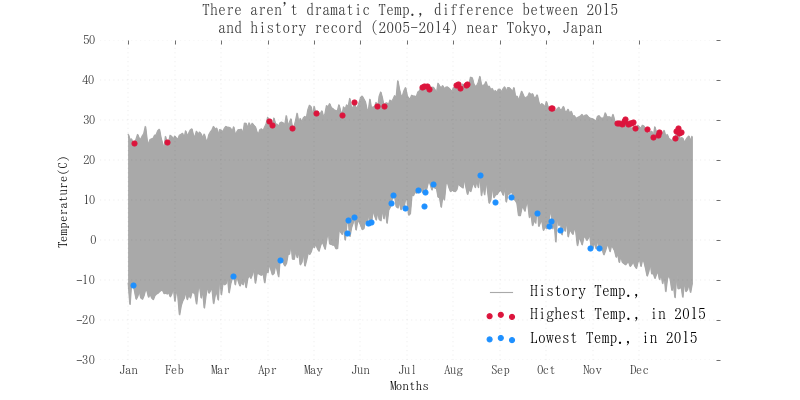

In [13]:
df2 = df1 / 10
plt.figure(figsize=(10, 5))

# set x position for every day
df2['x'] = df2.reset_index().index

# title
plt.title("There aren't dramatic Temp., difference between 2015\nand history record (2005-2014) near Tokyo, Japan", alpha=0.8)

# add label
plt.xlabel('Months')
plt.ylabel('Temperature(C)')

# set default color
default_color = 'darkgrey'

x = range(df2.shape[0])
plt.plot(x, df2['MAX'], color=default_color, label='History Temp.,')
plt.plot(x, df2['MIN'], color=default_color, label='_nolegend_')

# add xticks on month basis
xval = int(365 / 12)
xpos, xticks = [xval * i for i in range(12)], calendar.month_abbr[1:13]
plt.xticks(xpos, xticks, alpha=0.8)
plt.yticks(alpha=0.8)

# fill between highest and lowest degree
plt.gca().fill_between(x, df2['MIN'], df2['MAX'], color=default_color)

# tick param setting
plt.tick_params(axis='both', which='both', left='off', bottom='off')

# remove frame
for _, spine in plt.gca().spines.items():
    spine.set_visible(False)
    
# add 2015 data
max_plot_criteria = (df2['MAX_2015'] > df2['MAX'])
min_plot_criteria = (df2['MIN_2015'] < df2['MIN'])
plt.scatter(df2[max_plot_criteria]['x'], df2[max_plot_criteria]['MAX_2015'],
            color='crimson', zorder=3, label='Highest Temp., in 2015')
plt.scatter(df2[min_plot_criteria]['x'], df2[min_plot_criteria]['MIN_2015'],
            color='dodgerblue', zorder=5, label='Lowest Temp., in 2015')

# add legends
plt.legend(loc=4, frameon=False)

plt.grid(color='black', linewidth=0.3, alpha=0.2)